# Titanic tutorial

In [1]:
# External imports
import numpy as np 
import pandas as pd 
import sys

# Internal imports
from TitanicUtils import SurvivalRate 
sys.path.append('../Common')
from PlotUtils import Plot


### Load and inspect data

In [2]:
# Load DataFrames
train_ = pd.read_csv('../Data/titanic/train.csv') # truth 
test_ = pd.read_csv('../Data/titanic/test.csv') # data
train_.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
srate = SurvivalRate(train_, printout=True, output=False)

print('Sex-based surival rate:')
srate.get_sex_rate()
print('\nPClass-based surival rate:')
srate.get_class_rate()
print('\nSibSp-based surival rate:')
srate.get_sibsp_rate()
print('\nParch-based surival rate:')
srate.get_parch_rate()

Sex-based surival rate:
Surviving male: 18.9%
Surviving female: 74.2%

PClass-based surival rate:
Survivors in class 1: 63.0%
Survivors in class 2: 47.3%
Survivors in class 3: 24.2%

SibSp-based surival rate:
Survivors with 0 spouse + siblings: 34.5%
Survivors with 1 spouse + siblings: 53.6%
Survivors with 2 spouse + siblings: 46.4%
Survivors with 3 spouse + siblings: 25.0%
Survivors with 4 spouse + siblings: 16.7%
Survivors with 5 spouse + siblings: 0.0%
Survivors with 8 spouse + siblings: 0.0%

Parch-based surival rate:
Survivors with 0 parents + children: 34.4%
Survivors with 1 parents + children: 55.1%
Survivors with 2 parents + children: 50.0%
Survivors with 3 parents + children: 60.0%
Survivors with 4 parents + children: 0.0%
Survivors with 5 parents + children: 20.0%
Survivors with 6 parents + children: 0.0%


### Training

In [4]:
# Training 
from sklearn.ensemble import RandomForestClassifier

y_ = train_["Survived"]

features_ = ["Pclass", "Sex", "SibSp", "Parch"]
X_ = pd.get_dummies(train_[features_]) # training dataset as boolean values
X_test_ = pd.get_dummies(test_[features_])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_, y_)
predictions_ = model.predict(X_test_)

output_ = pd.DataFrame({'PassengerId': test_.PassengerId, 'Survived': predictions_})
output_.to_csv('../Output/Titanic/Tutorial.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


### Compare results

In [ ]:
# Merge output with test dataset for comparison
pred_ = pd.merge(output_, test_, on='PassengerId')
pred_.head()

# Training surival rate (actually a copy of srate)
srate_t = SurvivalRate(train_, printout=False, output=True)
# Predicted surivial rate
srate_p = SurvivalRate(pred_, printout=False, output=True)

# Parameters to compare on 
sex_ = { 'Train' : srate_t.get_sex_rate(),
        'Prediction' : srate_p.get_sex_rate() } 

class_ = { 'Train' : srate_t.get_class_rate(), 
            'Prediction' : srate_p.get_class_rate() } 

sibsp_ = { 'Train' : srate_t.get_sibsp_rate(), 
            'Prediction' : srate_p.get_sibsp_rate() } 

parch_ = { 'Train' : srate_t.get_parch_rate(), 
            'Prediction' : srate_p.get_parch_rate() } 

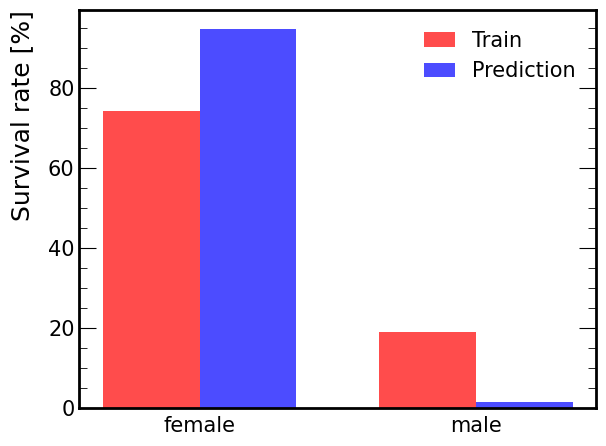

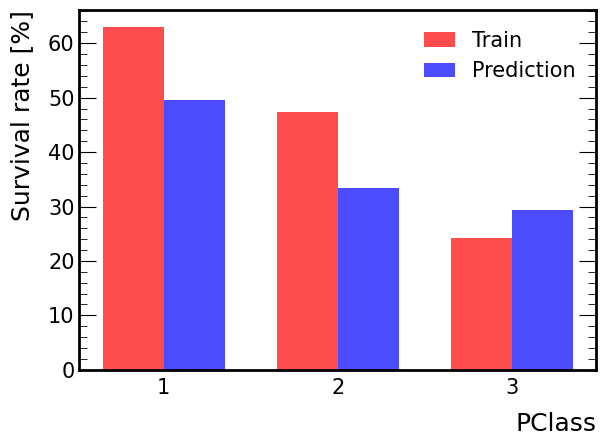

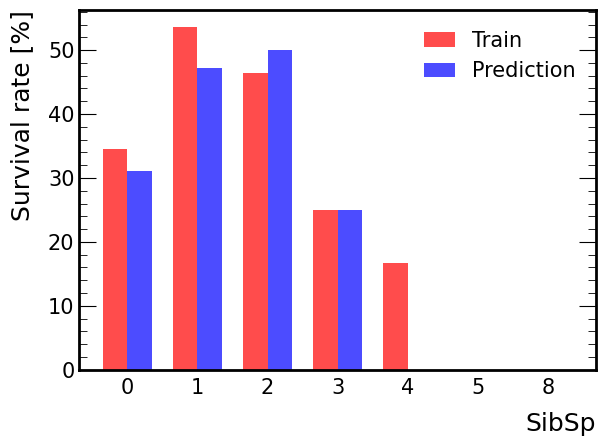

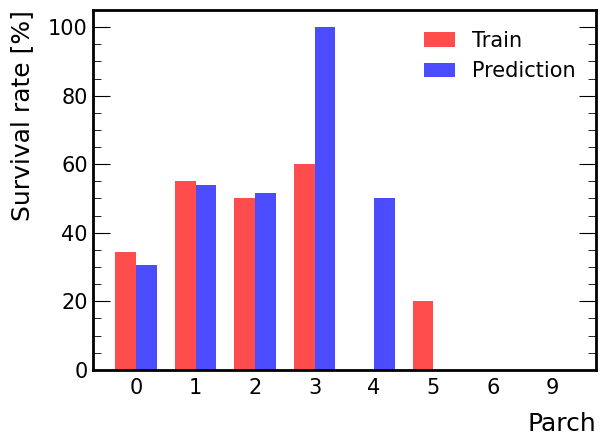

In [ ]:
# Make plots
pl = Plot() 
pl.plot_bar_overlay(data_dict=sex_, ylabel='Survival rate [%]', save=False, show=True)
pl.plot_bar_overlay(data_dict=class_, xlabel='PClass', ylabel='Survival rate [%]', save=False, show=True)
pl.plot_bar_overlay(data_dict=sibsp_, xlabel='SibSp', ylabel='Survival rate [%]', save=False, show=True)
pl.plot_bar_overlay(data_dict=parch_, xlabel='Parch', ylabel='Survival rate [%]', save=False, show=True)